In [2]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# **Question 1**
####Define the following concepts:

## (a) Subgraph

R: This is a small fraction of the total graph

##(b) Bipartite graph

R: Defined when the vertices of a graph can be divided into two disjoint sets

## (c) Hamiltonian graph

R: It is characterized when the graph has a closed cycle that in turn visits each vertex only once.

## (d) Eulerian graph

A: In its concept, an Eulerian graph is one in which it is impossible to cover all vertices without retracing any edge. In this way, making a closed walk through the graph that visits each edge exactly once and returns to the initial vertex.

# **Question 2**
#### Describe how a breadth-first search algorithm works:



R: It works in a way that it starts at the root of the tree or graph and investigates all the nodes at the current depth level before moving on to the nodes at the next depth level.

# **Question 3**
####How many edges does a complete graph with n vertices have? What about a complete directed graph with n vertices?

A: A complete graph has an edge between any two vertices. You can get an edge by choosing any two vertices. So if there are n vertices, there will be n choices.

# **Question 4**
####What are isomorphic graphs? Draw an example.


A: Graphs are isomorphic if there is a structure that preserves a one-to-one correspondence between vertices and edges. Example:
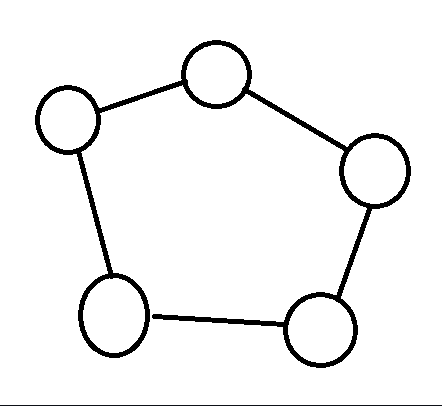

# **Question 5**
####Calculate the degree of the nodes for both node types in the bipartite adjacency matrix from the figure below. Find the isolated node(s).
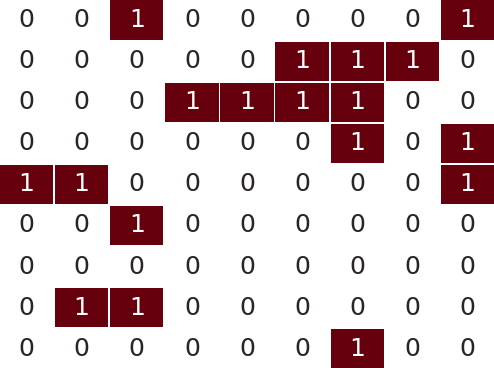

R:
Degree of X: 2 (connected to A and C)


---


Degree of Y: 1 (connected to B)


---


Degree of Z: 2 (connected to A and B)


---


Degree of A: 2 (connected to X and Z)


---


Degree of B: 2 (connected to Y and Z)


---


Degree of C: 1 (connected to X)


---
In this example there are no isolated nodes, as all nodes have at least one connection.




# **Question 6**
Given the digraph G = (V, E) where V = {M, N, O, P, Q, R, S} and E ={(M, S), (N, O), (P, R), (N, S), (O, M), (N, Q), (O, M), (P, P), (S, M), (O, N),  (S, M), (N, R), (P, M), (M, S)}

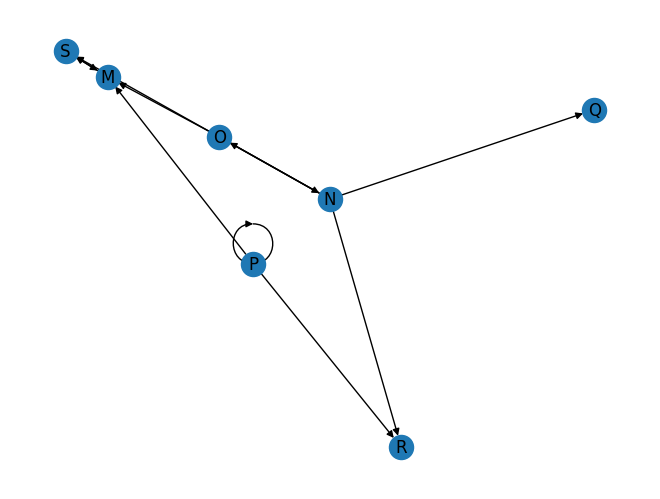

In [3]:
# Create the graph
G = nx.DiGraph()

# Add the nodes to the graph
G.add_nodes_from(['M', 'N', 'O', 'P', 'Q', 'R', 'S'])

# Add the edges to the graph
G.add_edges_from([('M', 'S'), ('N', 'O'), ('P', 'R'), ('N', 'S'), ('O', 'M'), ('N', 'Q'), ('O', 'M'), ('P', 'P'), ('S', 'M'), ('O', 'N'),  ('S', 'M'), ('N', 'R'), ('P', 'M'), ('M', 'S')])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

## (a) Specify, if any, a simple path from vertex M to vertex S.

In [4]:
nx.is_simple_path(G, ['M', 'S'])

True

## (b) Specify, if any, a simple cycle, involving at least 4 nodes.

In [5]:
sorted(nx.simple_cycles(G))

[['M', 'S'], ['N', 'O'], ['P']]

## (c) Is the digraph connected or not connected?

In [6]:
nx.is_connected(G)

NetworkXNotImplemented: not implemented for directed type

R: The digraph is not connected because it is a direct graph.

## (d) What is the degree of vertices N and R.

In [7]:
nx.degree(G, ['N', 'R'])

DiDegreeView({'N': 5, 'R': 2})

## (e) Represent the digraph using adjacency list representation.

In [8]:
for line in nx.generate_adjlist(G):
  print(line)

M S
N O S Q R
O M N
P R P M
Q
R
S M


## (f) Represent the digraph using adjacency matrix representation.

In [9]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 0 0 0 0 0 1]
 [0 0 1 0 1 1 1]
 [1 1 0 0 0 0 0]
 [1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


# **Question 7**
Draw the undirected and directed versions of the graph G(V, E), where V = {1, 2, 3, 4, 5, 6} and E = {(2, 5), (6, 1), (5, 3), (2, 3)}.

### Direct Version:

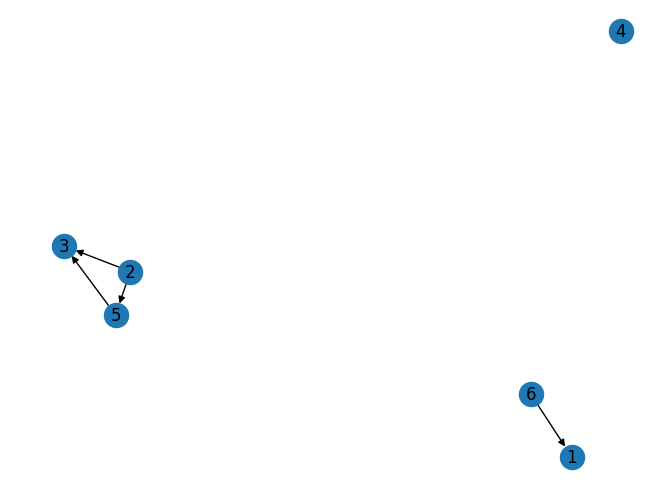

In [10]:
# Create the directed version
G = nx.DiGraph()

# Add the nodes to the graph
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add the edges to the graph / #11
G.add_edges_from([(2, 5), (6, 1), (5, 3), (2, 3)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

###Undirect version:

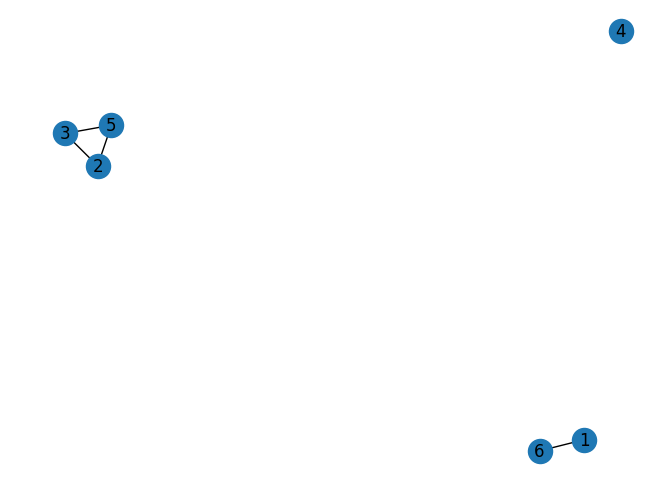

In [11]:
# Create the undirected version
G = nx.Graph()

# Add the nodes to the graph
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add the edges to the graph / #11
G.add_edges_from([(2, 5), (6, 1), (5, 3), (2, 3)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

# **Question 8**
How many edges does a graph have 3 vertices of degree 3 and one vertex of degree 5?

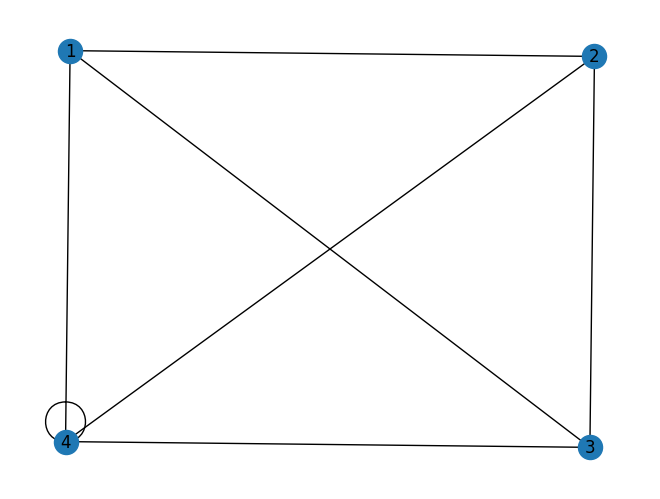

7

In [12]:
# Create the graph
G = nx.Graph()

# Add the nodes to the graph
G.add_nodes_from([1, 2, 3, 4])

# Add the edges to the graph
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 4)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

# Count the edges
len(G.edges())

In [13]:
# Lets check if everything is correct
nx.degree(G)

DegreeView({1: 3, 2: 3, 3: 3, 4: 5})

# **Question 9**
Mr. A is friend with Mrs. B, but she doesn't like him back. She has a reciprocal friendship with both C and D, but only C considers D a friend. D has also sent friend requests to E, F, G, and H but, so far, only G replied. G also has a reciprocal relationship with A. Draw the corresponding directed graph.

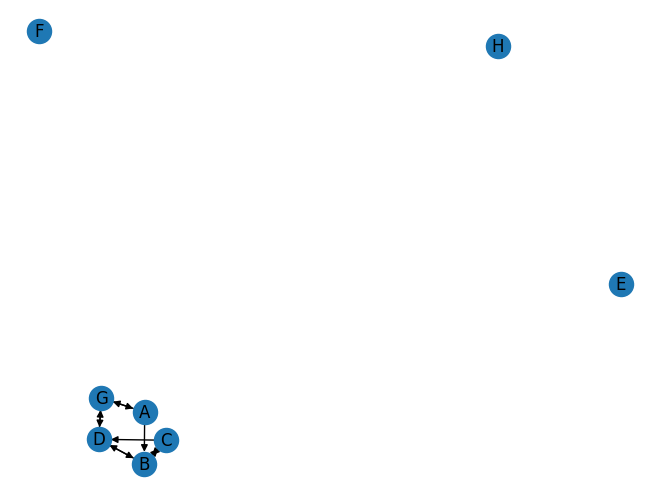

In [14]:
# Setting the graph
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])
G.add_edges_from([("A", "B"), ("B", "C"), ("C", "B"), ("B", "D"),
                  ("D", "B"), ("C", "D"), ("D", "G"), ("G", "D"), ("G", "A"), ("A", "G")])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


# **Question 10**
Draw the graph from the previous exercise as undirected and weighted, with the weight being 2 if the connection is reciprocal, 1 otherwise.

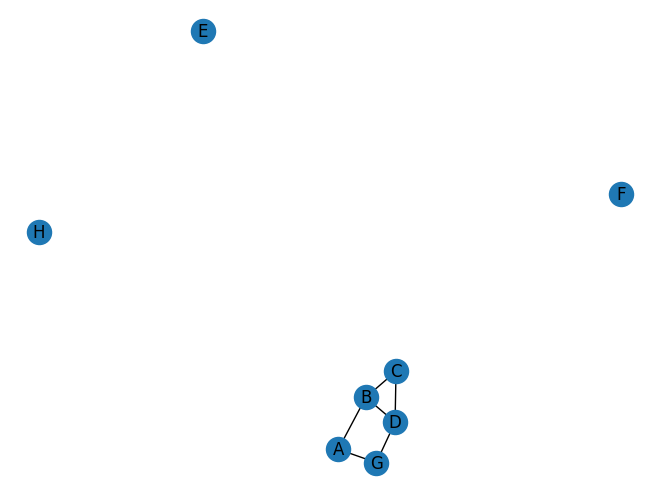

[('A', 'B', {'weight': 1}),
 ('A', 'G', {'weight': 2}),
 ('B', 'C', {'weight': 2}),
 ('B', 'D', {'weight': 2}),
 ('C', 'D', {'weight': 1}),
 ('D', 'G', {'weight': 2})]

In [15]:
# Setting the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])

# Setting weight 2 if the connection is reciprocal, 1 otherwise
G.add_weighted_edges_from([("A", "B", 1), ("B", "C", 2), ("B", "D", 2), ("C", "D", 1), ("D", "G", 2), ("A", "G", 2)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

# Let's check if everything is okay
sorted(G.edges.data())
